# Importing libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [3]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

#Bagging
#Boosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
#Stacking
from mlxtend.classifier import StackingClassifier

In [4]:
import os
os.getcwd()

'C:\\Users\\PRIYA'

# Reading the dataset

In [5]:

train_df = pd.read_csv('C:\projects-files\mentall-illness-project/Stress_Data.csv',encoding='ISO-8859–1')


#Pandas: whats the data row count?
print(train_df.shape)
    
#Pandas: whats the distribution of the data?
print(train_df.describe())
    
#Pandas: What types of data do i have?
print(train_df.info())

(112792, 20)
                  ID        Dem_age  Dem_dependents  Dem_isolation_adults  \
count  112792.000000  112792.000000   109287.000000          93460.000000   
mean    63026.552672      39.046705        0.863067              1.563525   
std     37120.219919      14.186779        1.651936              2.791970   
min         5.000000      18.000000        0.000000              0.000000   
25%     29011.750000      27.000000        0.000000              1.000000   
50%     65816.500000      37.000000        0.000000              1.000000   
75%     95342.250000      49.000000        2.000000              2.000000   
max    125306.000000     110.000000      110.000000            110.000000   

       Dem_isolation_kids  Corona_concerns_yourself  Corona_concerns_family  \
count        91909.000000              99935.000000            99531.000000   
mean             0.489114                  4.062200                4.836704   
std              1.311498                  1.472877     

In [6]:
train_df = train_df.drop(['ID'], axis= 1)
train_df = train_df.drop(['Dem_state'], axis= 1)

In [7]:
train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,answered_all,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,Corona_concerns_yourself,Corona_concerns_family,Corona_concerns_close_friends,Corona_concerns_country,Corona_concerns_global
0,No,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,Married/cohabiting,0.0,Yes,Isolated,1.0,0.0,4.0,4.0,3.0,6.0,NaN
1,Yes,68,Male,"College degree, bachelor, master",College degree,Retired,Italy,Married/cohabiting,0.0,No,Life carries on with minor changes,1.0,0.0,5.0,5.0,5.0,5.0,5.0
2,Yes,29,Other/would rather not say,"Some College, short continuing education or eq...",Some College or equivalent,Part time employed,Argentina,Other or would rather not say,1.0,Yes,Isolated,0.0,1.0,2.0,2.0,2.0,5.0,5.0
3,Yes,38,Female,Up to 12 years of school,Up to 12 years of school,Not employed,Argentina,Married/cohabiting,1.0,Yes,Life carries on with minor changes,1.0,0.0,4.0,4.0,3.0,3.0,4.0
4,No,35,Female,"College degree, bachelor, master",College degree,Full time employed,Panama,Married/cohabiting,NaN,Yes,Life carries on with minor changes,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [8]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Dem_age']
stringFeatures = ['answered_all','Dem_gender','Dem_edu','Dem_edu_mom','Dem_employment','Country','Dem_maritalstatus','Dem_riskgroup','Dem_isolation']
floatFeatures = ['Dem_dependents','Dem_isolation_adults','Dem_isolation_kids','Corona_concerns_yourself','Corona_concerns_family','Corona_concerns_close_friends','Corona_concerns_country','Corona_concerns_global']
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)   

,answered_all,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,Corona_concerns_yourself,Corona_concerns_family,Corona_concerns_close_friends,Corona_concerns_country,Corona_concerns_global
0,No,61,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Retired,Argentina,Married/cohabiting,0.0,Yes,Isolated,1.0,0.0,4.0,4.0,3.0,6.0,0.0
1,Yes,68,Male,"College degree, bachelor, master",College degree,Retired,Italy,Married/cohabiting,0.0,No,Life carries on with minor changes,1.0,0.0,5.0,5.0,5.0,5.0,5.0
2,Yes,29,Other/would rather not say,"Some College, short continuing education or eq...",Some College or equivalent,Part time employed,Argentina,Other or would rather not say,1.0,Yes,Isolated,0.0,1.0,2.0,2.0,2.0,5.0,5.0
3,Yes,38,Female,Up to 12 years of school,Up to 12 years of school,Not employed,Argentina,Married/cohabiting,1.0,Yes,Life carries on with minor changes,1.0,0.0,4.0,4.0,3.0,3.0,4.0
4,No,35,Female,"College degree, bachelor, master",College degree,Full time employed,Panama,Married/cohabiting,0.0,Yes,Life carries on with minor changes,2.0,2.0,2.0,2.0,2.0,2.0,2.0


# Checking null values

<AxesSubplot:>

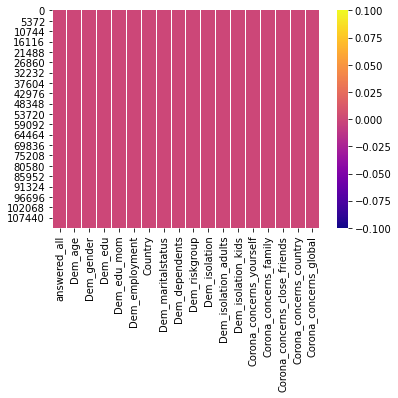

In [9]:
import seaborn as sns
sns.heatmap(train_df.isnull(),cmap='plasma')

# Visualization

<AxesSubplot:xlabel='answered_all', ylabel='count'>

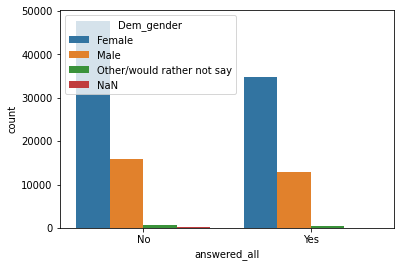

In [10]:
sns.countplot(x='answered_all',hue='Dem_gender',data=train_df)

<AxesSubplot:xlabel='answered_all', ylabel='count'>

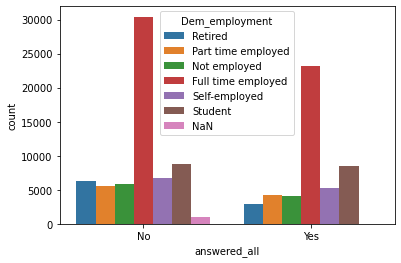

In [11]:
sns.countplot(x='answered_all',hue='Dem_employment',data=train_df)

<AxesSubplot:xlabel='answered_all', ylabel='count'>

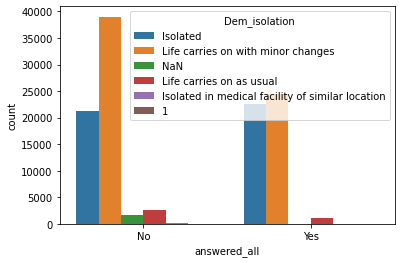

In [12]:
sns.countplot(x='answered_all',hue='Dem_isolation',data=train_df)

<AxesSubplot:xlabel='answered_all', ylabel='count'>

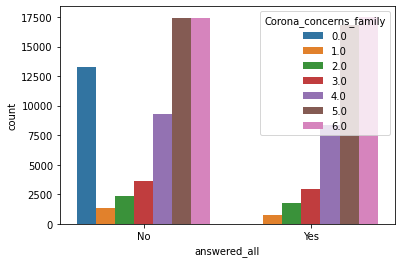

In [13]:
sns.countplot(x='answered_all',hue='Corona_concerns_family',data=train_df)

In [14]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)



label_answered_all ['No', 'Yes']
label_Dem_age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 97, 99, 101, 105, 107, 108, 110]
label_Dem_gender ['Female', 'Male', 'NaN', 'Other/would rather not say']
label_Dem_edu ['College degree, bachelor, master', 'NaN', 'None', 'PhD/Doctorate', 'Some College, short continuing education or equivalent', 'Uninformative response', 'Up to 12 years of school', 'Up to 6 years of school', 'Up to 9 years of school']
label_Dem_edu_mom ['College degree', 'NaN', 'None', 'PhD/Doctorate', 'Some College or equivalent', 'Uninformative response', 'Up to 12 years of school', 'Up to 6 years of school', 'Up to 9 years of school']
label_Dem_employment ['Full time employed', 'NaN', 'Not employed', 'Part time empl

In [15]:
train_df.head()

,answered_all,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,Corona_concerns_yourself,Corona_concerns_family,Corona_concerns_close_friends,Corona_concerns_country,Corona_concerns_global
0,0,43,0,4,6,4,6,1,0,3,1,1,0,4,4,3,6,0
1,1,50,1,0,0,4,75,1,0,1,4,1,0,5,5,5,5,5
2,1,11,3,4,4,3,6,3,1,3,1,0,1,2,2,2,5,5
3,1,20,0,6,6,2,6,1,1,3,4,1,0,4,4,3,3,4
4,0,17,0,0,0,0,121,1,0,3,4,2,2,2,2,2,2,2


c:\users\priya\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

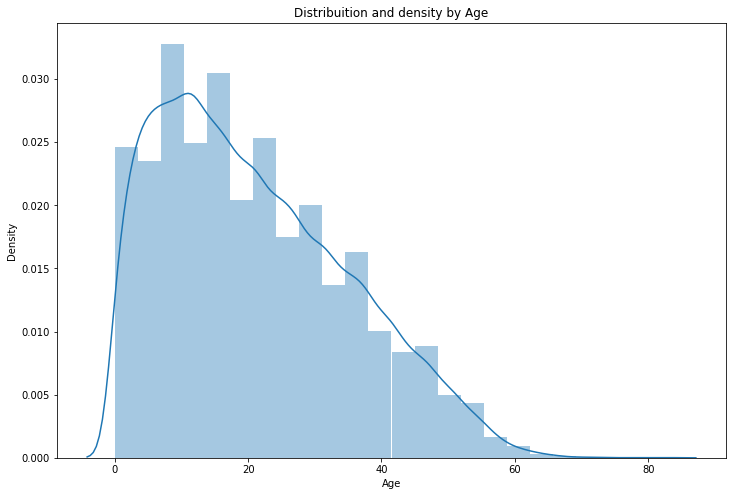

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(train_df["Dem_age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

# Standardization

In [17]:
scaler = MinMaxScaler()
train_df['Dem_age'] = scaler.fit_transform(train_df[['Dem_age']])
train_df.head()

,answered_all,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,Corona_concerns_yourself,Corona_concerns_family,Corona_concerns_close_friends,Corona_concerns_country,Corona_concerns_global
0,0,0.518072,0,4,6,4,6,1,0,3,1,1,0,4,4,3,6,0
1,1,0.602410,1,0,0,4,75,1,0,1,4,1,0,5,5,5,5,5
2,1,0.132530,3,4,4,3,6,3,1,3,1,0,1,2,2,2,5,5
3,1,0.240964,0,6,6,2,6,1,1,3,4,1,0,4,4,3,3,4
4,0,0.204819,0,0,0,0,121,1,0,3,4,2,2,2,2,2,2,2


In [18]:
x=train_df.drop('answered_all',axis=1).values
x

array([[0.51807229, 0.        , 4.        , ..., 3.        , 6.        ,
        0.        ],
       [0.60240964, 1.        , 0.        , ..., 5.        , 5.        ,
        5.        ],
       [0.13253012, 3.        , 4.        , ..., 2.        , 5.        ,
        5.        ],
       ...,
       [0.40963855, 0.        , 4.        , ..., 4.        , 6.        ,
        6.        ],
       [0.43373494, 1.        , 4.        , ..., 2.        , 4.        ,
        5.        ],
       [0.46987952, 0.        , 6.        , ..., 5.        , 6.        ,
        6.        ]])

In [19]:
y=train_df['answered_all'].values
y

array([0, 1, 1, ..., 0, 0, 0])

# Splitting training and testing dataset

In [20]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


# Applying models

# 1.Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
classifier1=LogisticRegression()
classifier1.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred1=classifier1.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print(x_test.shape)
cn1=confusion_matrix(y_test,y_pred1)
print(cn1)
accuracy_score(y_test,y_pred1)

(33838, 17)
[[13891  5525]
 [ 6670  7752]]


0.6396063597139311

In [23]:
dframe=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred1})
dframe

,Actual price,Predicted price
0,0,1
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
33833,1,1
33834,0,1
33835,0,0
33836,0,0


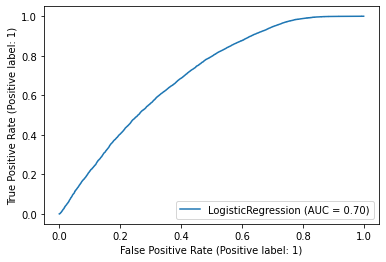

In [24]:
svc_disp1 =plot_roc_curve(classifier1, x_test, y_test)
plt.show()

# Decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier2= DecisionTreeClassifier(criterion = 'entropy')
classifier2.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [26]:
y_pred2=classifier2.predict(x_test)
print(x_test.shape)
cn2=confusion_matrix(y_test,y_pred2)
print(cn2)
accuracy_score(y_test,y_pred2)

(33838, 17)
[[13514  5902]
 [ 5852  8570]]


0.6526390448608074

In [27]:
dframe=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred2})
dframe

,Actual price,Predicted price
0,0,1
1,1,1
2,0,0
3,0,1
4,0,1
...,...,...
33833,1,0
33834,0,1
33835,0,0
33836,0,0


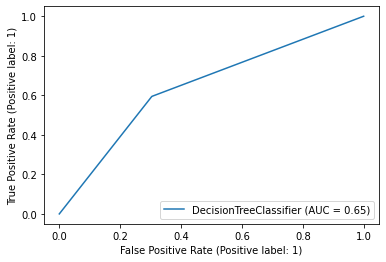

In [28]:
svc_disp2 =plot_roc_curve(classifier2, x_test, y_test)
plt.show()

# RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier3= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier3.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [30]:
y_pred3=classifier3.predict(x_test)
print(x_test.shape)
cn3=confusion_matrix(y_test,y_pred3)
print(cn3)
accuracy_score(y_test,y_pred3)


(33838, 17)
[[14291  5125]
 [ 5575  8847]]


0.683787457887582

In [31]:
dframe=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred3})
dframe

,Actual price,Predicted price
0,0,1
1,1,1
2,0,1
3,0,0
4,0,0
...,...,...
33833,1,1
33834,0,0
33835,0,0
33836,0,0


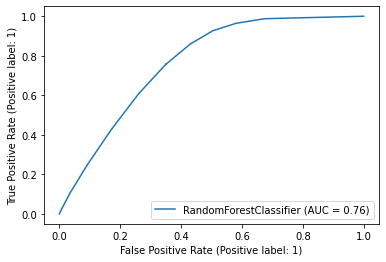

In [32]:
svc_disp3=plot_roc_curve(classifier3, x_test, y_test)
plt.show()

# Bagging

In [33]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
bag.fit(x_train, y_train)
y_pred4 = bag.predict(x_test)

In [34]:
print(x_test.shape)
cn4=confusion_matrix(y_test,y_pred4)
print(cn4)
accuracy_score(y_test,y_pred4)

(33838, 17)
[[14391  5025]
 [ 5922  8500]]


0.6764879721023701

In [35]:
dframe=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred4})
dframe

,Actual price,Predicted price
0,0,1
1,1,1
2,0,1
3,0,0
4,0,1
...,...,...
33833,1,1
33834,0,1
33835,0,0
33836,0,0


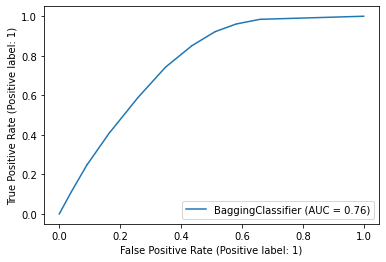

In [36]:
svc_disp4 =plot_roc_curve(bag, x_test, y_test)
plt.show()

# Boosting

In [37]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=100)
boost.fit(x_train, y_train)
y_pred5 = boost.predict(x_test)

In [38]:
y_pred5=boost.predict(x_test)
print(x_test.shape)
cn5=confusion_matrix(y_test,y_pred5)
print(cn5)
accuracy_score(y_test,y_pred5)

(33838, 17)
[[13650  5766]
 [ 4275 10147]]


0.7032626041728235

In [39]:
dframe=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred5})
dframe

,Actual price,Predicted price
0,0,1
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
33833,1,1
33834,0,1
33835,0,0
33836,0,0


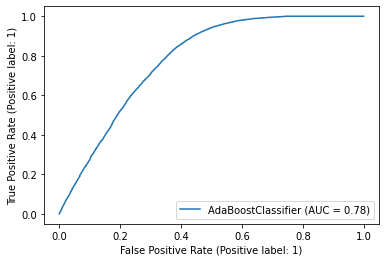

In [40]:
svc_disp5 =plot_roc_curve(boost, x_test, y_test)
plt.show()

# Stacking

In [41]:
clf1 = RandomForestClassifier(random_state=1)
clf2 = DecisionTreeClassifier()
lr = LogisticRegression()
stack = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=lr)
stack.fit(x_train, y_train)
    
y_pred6 = stack.predict(x_test)

In [42]:
print(x_test.shape)
cn6=confusion_matrix(y_test,y_pred6)
print(cn6)
accuracy_score(y_test,y_pred6)


(33838, 17)
[[11328  8088]
 [ 2337 12085]]


0.6919144157456114

In [43]:
dframe=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred6})
dframe

,Actual price,Predicted price
0,0,1
1,1,1
2,0,1
3,0,1
4,0,1
...,...,...
33833,1,1
33834,0,1
33835,0,0
33836,0,0


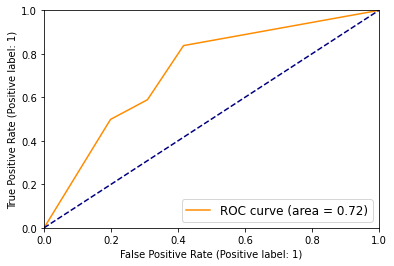

In [44]:
y_pred_prob = stack.predict_proba(x_test)[:, 1]
plot=True
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
if plot == True:
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.xlabel('False Positive Rate (Positive label: 1)')
    plt.ylabel('True Positive Rate (Positive label: 1)')
    plt.legend(loc="lower right")
    plt.show()
    

# Comparing models accuracy

In [45]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression()))
classification_models.append(('Decision Tree',DecisionTreeClassifier(criterion = 'entropy')))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators = 10, criterion = 'entropy')))
classification_models.append(('Bagging', BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)))
classification_models.append(('Boosting',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=1), n_estimators=50)))
classification_models.append(('Stacking', StackingClassifier(classifiers=[RandomForestClassifier(random_state=1),  DecisionTreeClassifier()], meta_classifier=LogisticRegression())))

In [48]:
results=[]
names=[]
from sklearn.model_selection import KFold
for name, model in classification_models:
  kfold = KFold(n_splits=10)
  result = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
  results.append(result)
  names.append(name)
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 64.06% - SD Accuracy = 1.10%
Decision Tree: Mean Accuracy = 65.19% - SD Accuracy = 0.96%
Random Forest: Mean Accuracy = 68.63% - SD Accuracy = 1.30%
Bagging: Mean Accuracy = 67.92% - SD Accuracy = 1.11%
Boosting: Mean Accuracy = 70.02% - SD Accuracy = 1.03%
Stacking: Mean Accuracy = 69.35% - SD Accuracy = 0.86%


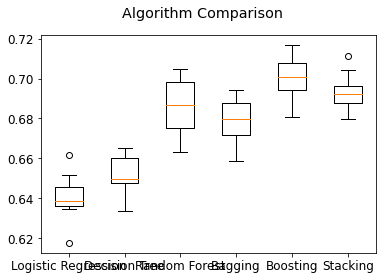

In [49]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [50]:
clf = AdaBoostClassifier()
clf.fit(x, y)
dfTestPredictions = clf.predict(x_test)

# Write predictions to csv file

results = pd.DataFrame({'answered_all': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

,answered_all
0,1
1,1
2,1
3,1
4,0


In [51]:
results = pd.DataFrame({'answered_all': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('submission.csv', index=False)

Text(0.5, 1.0, 'Total Distribuition by stress or not')

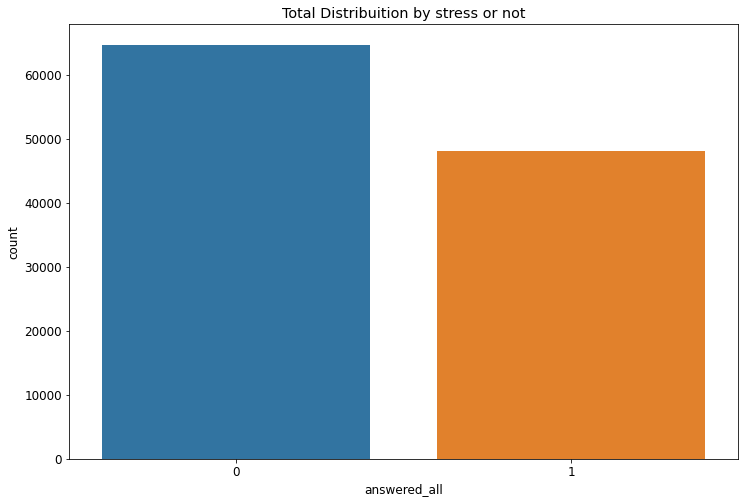

In [52]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Dem_gender']
g = sns.countplot(x="answered_all", data=train_df)

plt.title('Total Distribuition by stress or not')